In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tsmoothie.utils_func import sim_seasonal_data
from tsmoothie.smoother import *

In [3]:
# generate sinusoidal timeseries
np.random.seed(33)

data = sim_seasonal_data(n_series=1, timesteps=300, freq=24, measure_noise=30)

In [4]:
# operate smoothing
smoother = WindowWrapper(
    LowessSmoother(smooth_fraction=0.3, iterations=1), window_shape=30
)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals("prediction_interval")

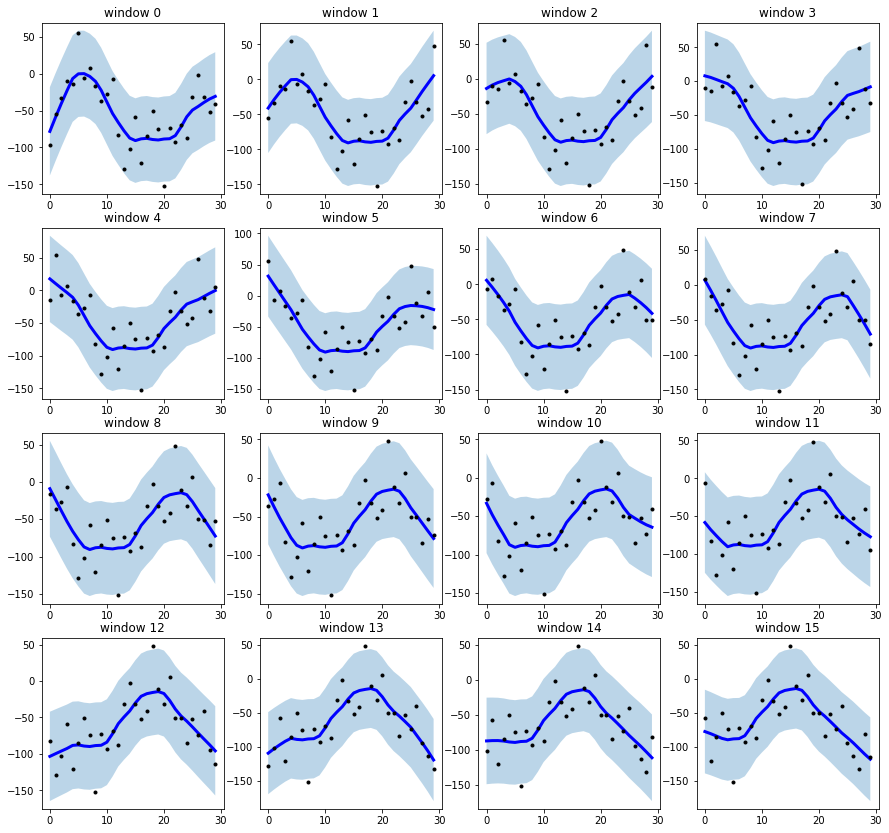

In [5]:
# plot the first windows with intervals
plt.figure(figsize=(15, 22))

for i, (true, smooth) in enumerate(
    zip(smoother.Smoother.data, smoother.Smoother.smooth_data)
):

    plt.subplot(6, 4, i + 1)
    plt.plot(smooth, linewidth=3, color="blue")
    plt.plot(true, ".k")
    plt.fill_between(range(len(true)), low[i], up[i], alpha=0.3)
    plt.title(f"window {i}")

    if i == 15:
        break